# Customer Segmentation Analysis

## This project scope is to perform customer segmentation analysis on a group of customers. By using KMeans unsupervised machine learning algorithm to find the univariate, bivariate clusters.  

## Objective: Customer segmentation clusters to develop marketing campaign startegy plan

# This project includes Data Exploration Analysis and Machine learning KMeans clustering analysis

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [10]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [11]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

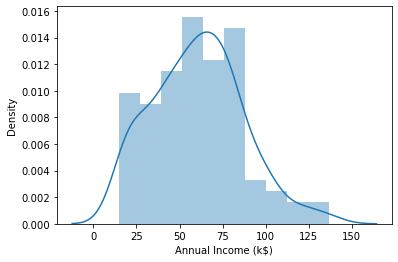

In [13]:
sns.distplot(customer_data['Annual Income (k$)'])

In [14]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

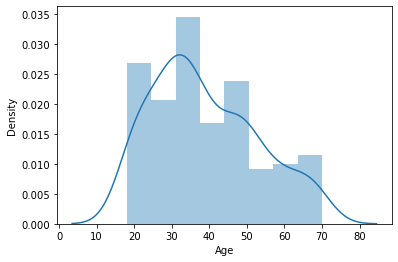

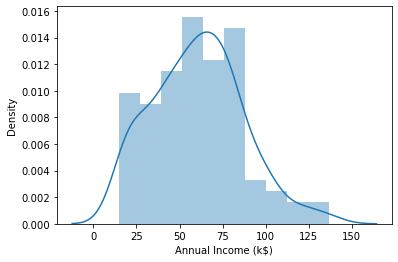

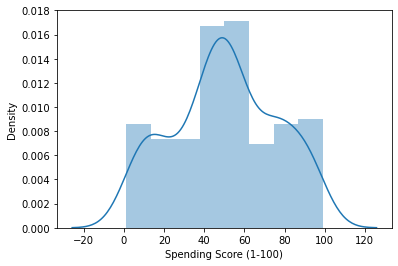

In [15]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(customer_data[i])
    

## Compare Gender with Annual Income "Univariate Analysis"

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

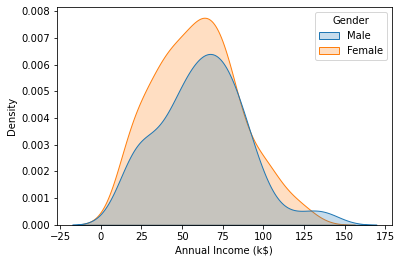

In [17]:
sns.kdeplot(customer_data['Annual Income (k$)'], shade=True, hue=customer_data['Gender'])

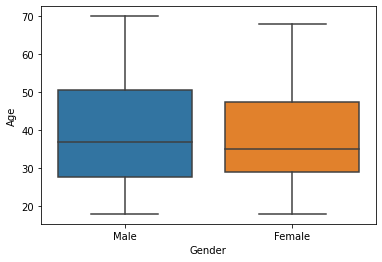

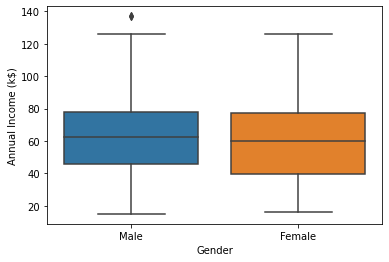

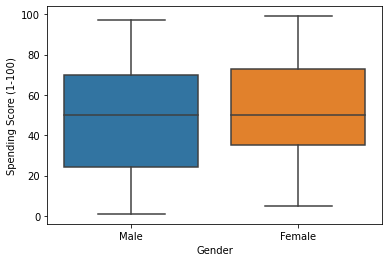

In [18]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data = customer_data, x='Gender', y= customer_data[i])

In [19]:
customer_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [20]:
customer_data['Gender'].value_counts(normalize =True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

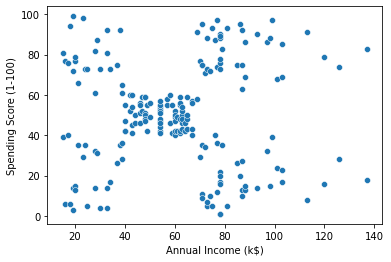

In [21]:
sns.scatterplot(data = customer_data, x= 'Annual Income (k$)', y= 'Spending Score (1-100)')

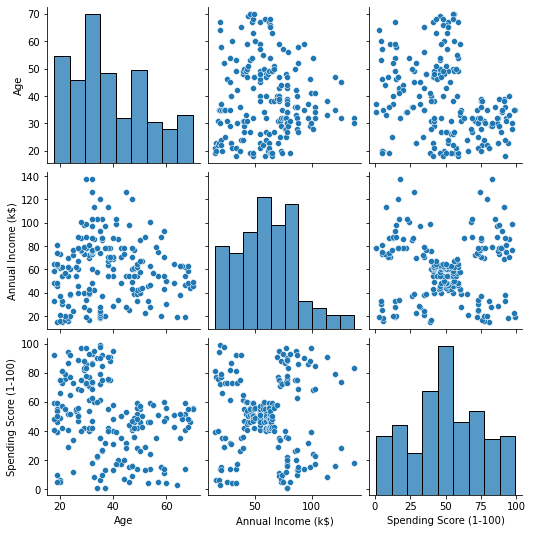

In [23]:
customer_data = customer_data.drop('CustomerID', axis=1)
sns.pairplot(customer_data)

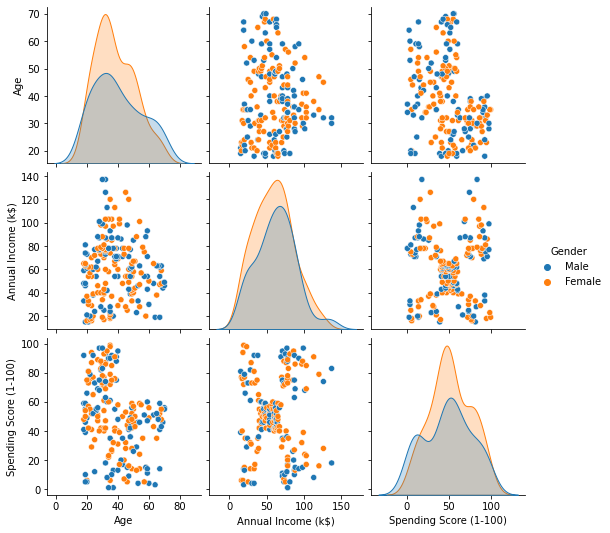

In [24]:
sns.pairplot(customer_data, hue='Gender')

In [27]:
customer_data.groupby('Gender')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [28]:
customer_data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

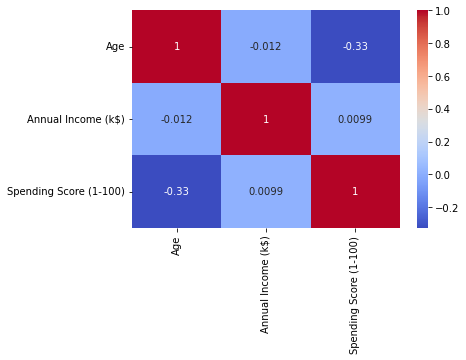

In [30]:
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm')

## Clustering Univariate

In [40]:
clustering_income = KMeans(n_clusters=6)

In [41]:
clustering_income.fit(customer_data[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [42]:
clustering_income.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
customer_data['Income cluster'] = clustering_income.labels_

In [44]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [45]:
customer_data['Income cluster'].value_counts()

3    48
5    42
0    42
1    32
4    28
2     8
Name: Income cluster, dtype: int64

In [46]:
clustering_income.inertia_

5050.904761904766

In [48]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_data[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

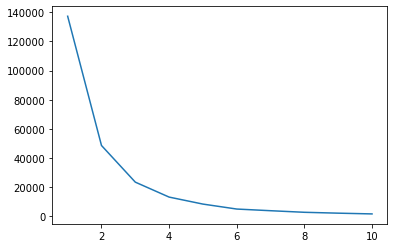

In [49]:
plt.plot(range(1,11), inertia_scores)

In [50]:
clustering_income = KMeans(n_clusters=3)

In [51]:
clustering_income.fit(customer_data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [52]:
customer_data['Income cluster'] = clustering_income.labels_

In [53]:
customer_data['Income cluster'].value_counts()

0    92
2    72
1    36
Name: Income cluster, dtype: int64

In [54]:
clustering_income.inertia_

23528.152173913048

In [55]:
customer_data.groupby('Income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


## Bivariate Clustering

In [60]:
clustering_income_shopping = KMeans(n_clusters=5)

In [61]:
clustering_income_shopping.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [58]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

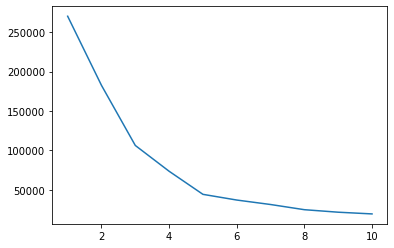

In [59]:
plt.plot(range(1,11), inertia_scores2)

In [62]:
customer_data['Income and shopping cluster'] = clustering_income_shopping.labels_

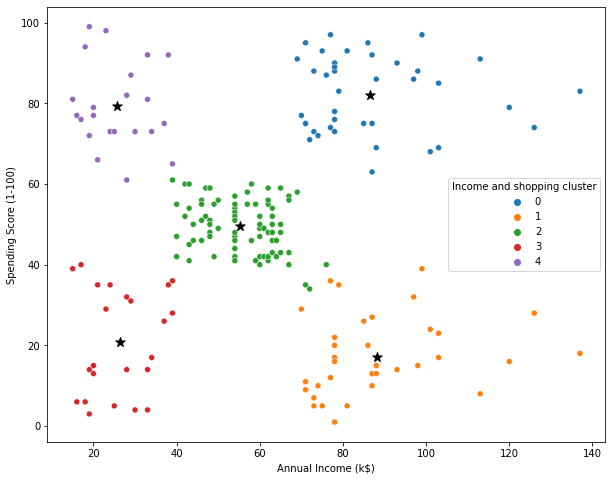

In [89]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = customer_data, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue='Income and shopping cluster', palette = 'tab10')
centers = pd.DataFrame(clustering_income_shopping.cluster_centers_)
centers.columns = ['x','y']
plt.scatter(x=centers['x'], y= centers['y'], s=100, c ='black', marker ='*')
plt.savefig('bivariate Clustering.png')

In [69]:
pd.crosstab(customer_data['Income and shopping cluster'], customer_data['Gender'], normalize='index')

Gender,Female,Male
Income and shopping cluster,,
0,0.538462,0.461538
1,0.457143,0.542857
2,0.592593,0.407407
3,0.608696,0.391304
4,0.590909,0.409091


In [70]:
customer_data.groupby('Income and shopping cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and shopping cluster,,,
0,32.692308,86.538462,82.128205
1,41.114286,88.200000,17.114286
2,42.716049,55.296296,49.518519
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [90]:
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Income and shopping cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,0
196,Female,45,126,28,1,1
197,Male,32,126,74,1,0
198,Male,32,137,18,1,1


In [91]:
customer_data.to_csv('clustering data.csv')

# Customer Segmentation Analysis Results:

## * Target group would be cluster (0): this includes customers with high spending score and high annual income


## * 54% of cluster(0) shoppers are women 

## * Cluster (4) presents an interesting oppotunity of high spending shoppers but with less annual income. Those shoppers may be targeted for sales items campaigns or popular items.